In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import joblib
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, callbacks, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("kigali_traffic_dataset.csv")
print(df.head())
print(df.info())
print(df['congestion_level'].value_counts())

  time_of_day weather       road_type  event congestion_level
0     morning    rain       main road      1             High
1     evening    rain     residential      1         Moderate
2   afternoon   foggy  secondary road      0              Low
3     evening  cloudy  secondary road      1         Moderate
4     evening   clear     residential      0             High
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   time_of_day       1000 non-null   object
 1   weather           1000 non-null   object
 2   road_type         1000 non-null   object
 3   event             1000 non-null   int64 
 4   congestion_level  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None
congestion_level
Moderate    380
Low         333
High        287
Name: count, dtype: int64


In [ ]:
df_encoded = df.copy()

for col in ['time_of_day', 'weather', 'road_type']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded['congestion_level'] = LabelEncoder().fit_transform(df_encoded['congestion_level'])

In [ ]:
X = df_encoded.drop('congestion_level', axis=1)
y = df_encoded['congestion_level']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42) 

Logistic Regression Model

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = logreg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Low', 'Moderate', 'High']))

Accuracy: 0.74
Precision: 0.7480600353820693
Recall: 0.74
F1 Score: 0.7427352521692144

Classification Report:
              precision    recall  f1-score   support

         Low       0.89      0.78      0.83        41
    Moderate       0.62      0.67      0.64        51
        High       0.76      0.78      0.77        58

    accuracy                           0.74       150
   macro avg       0.76      0.74      0.75       150
weighted avg       0.75      0.74      0.74       150



In [ ]:
joblib.dump(logreg, "saved_models/model-1.pkl")

['saved_models/logistic_model.pkl']

Basic Neural Network

In [ ]:
model_basic = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_basic.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

In [ ]:
history_basic = model_basic.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30, 
    verbose=1
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4999 - loss: 1.0338 - val_accuracy: 0.5267 - val_loss: 0.9356
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5730 - loss: 0.8990 - val_accuracy: 0.6267 - val_loss: 0.8511
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6262 - loss: 0.8189 - val_accuracy: 0.6333 - val_loss: 0.7865
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6680 - loss: 0.7559 - val_accuracy: 0.7067 - val_loss: 0.7296
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6723 - loss: 0.7236 - val_accuracy: 0.7400 - val_loss: 0.6822
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6806 - loss: 0.6981 - val_accuracy: 0.7333 - val_loss: 0.6451
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7283 - loss: 0.6160 - val_accuracy: 0.7800 - val_loss: 0.6120
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7508 - loss: 0.5928 - val_accuracy: 0.7933 - val_loss

In [ ]:
y_pred_probs = model_basic.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Low', 'Moderate', 'High']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.8466666666666667
Precision: 0.8500952380952381
Recall: 0.8466666666666667
F1 Score: 0.8438444421621991

Classification Report:
              precision    recall  f1-score   support

         Low       0.80      0.98      0.88        41
    Moderate       0.88      0.88      0.88        51
        High       0.86      0.72      0.79        58

    accuracy                           0.85       150
   macro avg       0.85      0.86      0.85       150
weighted avg       0.85      0.85      0.84       150



In [ ]:
model_basic.save("saved_models/model-2.keras")

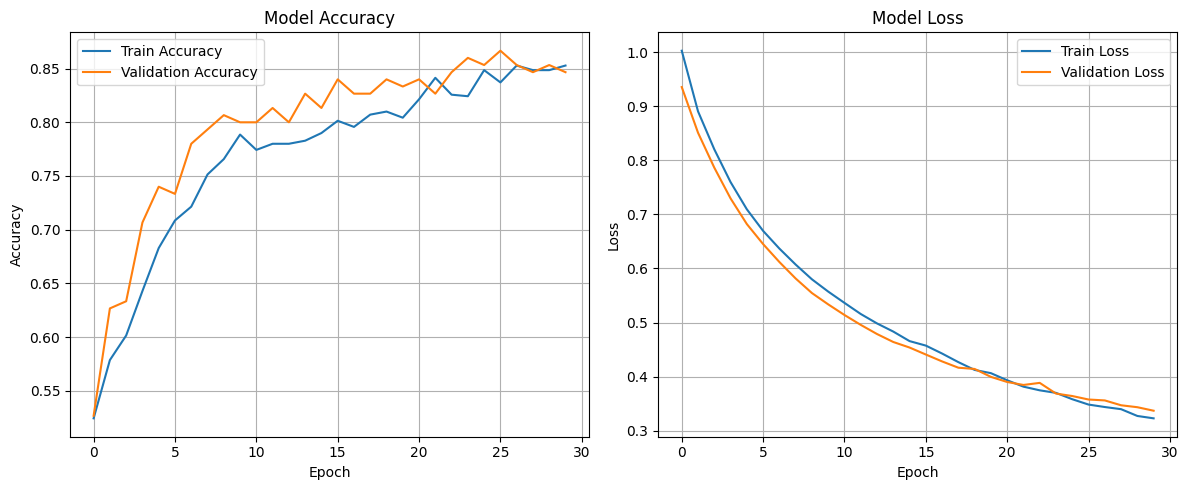

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Train Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Train Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Neural Network with Optimizations

In [ ]:
model_opt1 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = optimizers.RMSprop(learning_rate=0.001)

model_opt1.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history_opt1 = model_opt1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3591 - loss: 1.4410 - val_accuracy: 0.5733 - val_loss: 1.2783
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4379 - loss: 1.3175 - val_accuracy: 0.6400 - val_loss: 1.2014
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4990 - loss: 1.2515 - val_accuracy: 0.7000 - val_loss: 1.1405
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5420 - loss: 1.1983 - val_accuracy: 0.6733 - val_loss: 1.0827
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5804 - loss: 1.1238 - val_accuracy: 0.6933 - val_loss: 1.0243
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6121 - loss: 1.0744 - val_accuracy: 0.7333 - val_loss: 0.9797
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6148 - loss: 1.0497 - val_accuracy: 0.7333 - val_loss: 0.9363
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6485 - loss: 1.0008 - val_accuracy: 0.7267 - val_loss

In [ ]:
y_pred_probs = model_opt1.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Low', 'Moderate', 'High']))

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Accuracy: 0.8733333333333333
Precision: 0.8752651515151515
Recall: 0.8733333333333333
F1 Score: 0.8737183600713013

Classification Report:
              precision    recall  f1-score   support

         Low       0.84      0.90      0.87        41
    Moderate       0.94      0.88      0.91        51
        High       0.84      0.84      0.84        58

    accuracy                           0.87       150
   macro avg       0.87      0.88      0.87       150
weighted avg       0.88      0.87      0.87       150



In [ ]:
model_opt1.save("saved_models/model-3.keras")

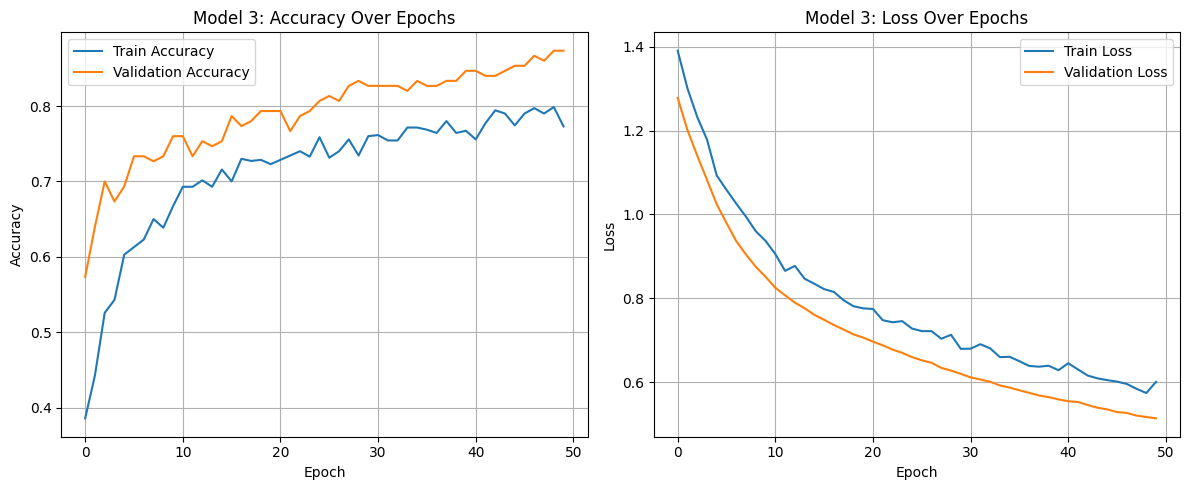

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_opt1.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_opt1.history['loss'], label='Train Loss')
plt.plot(history_opt1.history['val_loss'], label='Validation Loss')
plt.title('Model 3: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

 Neural Network with Adam + L2 + Dropout

In [ ]:
model_opt2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = optimizers.Adam(learning_rate=0.0005)

model_opt2.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop_2 = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history_opt2 = model_opt2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    callbacks=[early_stop_2],
    verbose=1
)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5539 - loss: 1.0408 - val_accuracy: 0.6867 - val_loss: 0.9520
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5851 - loss: 0.9857 - val_accuracy: 0.7200 - val_loss: 0.8996
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5973 - loss: 0.9704 - val_accuracy: 0.7200 - val_loss: 0.8570
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 0.9091 - val_accuracy: 0.7200 - val_loss: 0.8188
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6347 - loss: 0.9220 - val_accuracy: 0.7467 - val_loss: 0.7893
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6590 - loss: 0.8557 - val_accuracy: 0.7600 - val_loss: 0.7638
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6683 - loss: 0.8326 - val_accuracy: 0.7600 - val_loss: 0.7421
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6782 - loss: 0.8150 - val_accuracy: 0.7667 - val_loss:

In [ ]:
y_pred_probs_2 = model_opt2.predict(X_val)
y_pred_2 = np.argmax(y_pred_probs_2, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_2))
print("Precision:", precision_score(y_val, y_pred_2, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_2, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred_2, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_2, target_names=['Low', 'Moderate', 'High']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.86
Precision: 0.8631368471953579
Recall: 0.86
F1 Score: 0.8599597747385358

Classification Report:
              precision    recall  f1-score   support

         Low       0.81      0.93      0.86        41
    Moderate       0.94      0.88      0.91        51
        High       0.84      0.79      0.81        58

    accuracy                           0.86       150
   macro avg       0.86      0.87      0.86       150
weighted avg       0.86      0.86      0.86       150



In [ ]:
model_opt2.save("saved_models/model-4.keras")

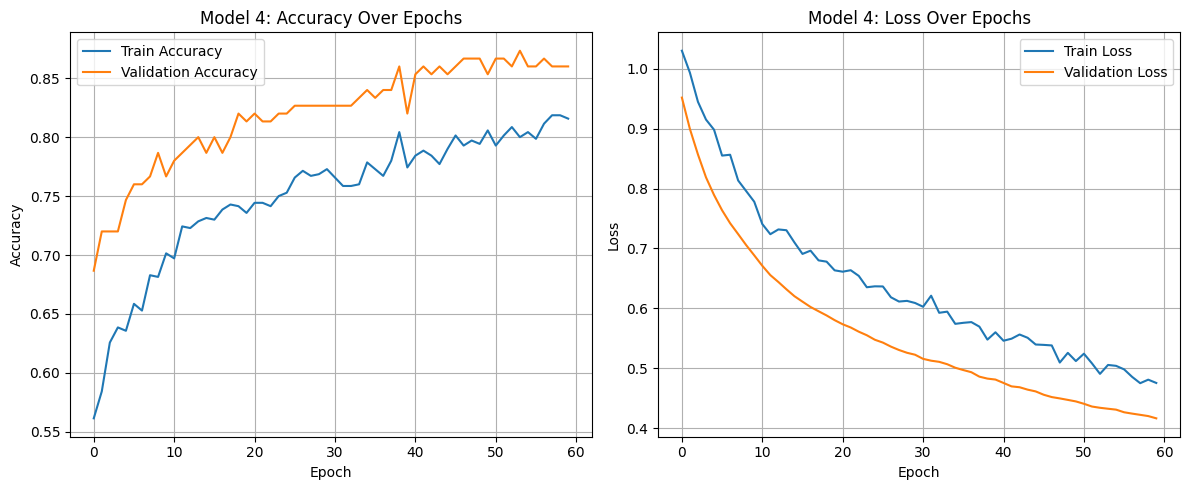

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_opt2.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 4: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_opt2.history['loss'], label='Train Loss')
plt.plot(history_opt2.history['val_loss'], label='Validation Loss')
plt.title('Model 4: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model 5

In [ ]:
model_opt3 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = optimizers.Nadam(learning_rate=0.0007)

model_opt3.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop_3 = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history_opt3 = model_opt3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    callbacks=[early_stop_3],
    verbose=1
)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4060 - loss: 3.3374 - val_accuracy: 0.5200 - val_loss: 3.0413
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5021 - loss: 2.9992 - val_accuracy: 0.6067 - val_loss: 2.6803
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 2.6335 - val_accuracy: 0.6467 - val_loss: 2.3629
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6106 - loss: 2.3624 - val_accuracy: 0.6533 - val_loss: 2.1060
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6423 - loss: 2.1039 - val_accuracy: 0.7067 - val_loss: 1.8912
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6077 - loss: 1.9077 - val_accuracy: 0.7133 - val_loss: 1.7134
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6457 - loss: 1.7405 - val_accuracy: 0.7133 - val_loss: 1.5681
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6673 - loss: 1.5791 - val_accuracy: 0.7400 - val_loss

In [ ]:
y_pred_probs_3 = model_opt3.predict(X_val)
y_pred_3 = np.argmax(y_pred_probs_3, axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred_3))
print("Precision:", precision_score(y_val, y_pred_3, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_3, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred_3, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred_3, target_names=['Low', 'Moderate', 'High']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy: 0.8133333333333334
Precision: 0.8240964483545129
Recall: 0.8133333333333334
F1 Score: 0.8151930420987026

Classification Report:
              precision    recall  f1-score   support

         Low       0.97      0.78      0.86        41
    Moderate       0.75      0.80      0.77        51
        High       0.79      0.84      0.82        58

    accuracy                           0.81       150
   macro avg       0.84      0.81      0.82       150
weighted avg       0.82      0.81      0.82       150



In [ ]:
model_opt3.save("saved_models/model-5.keras")

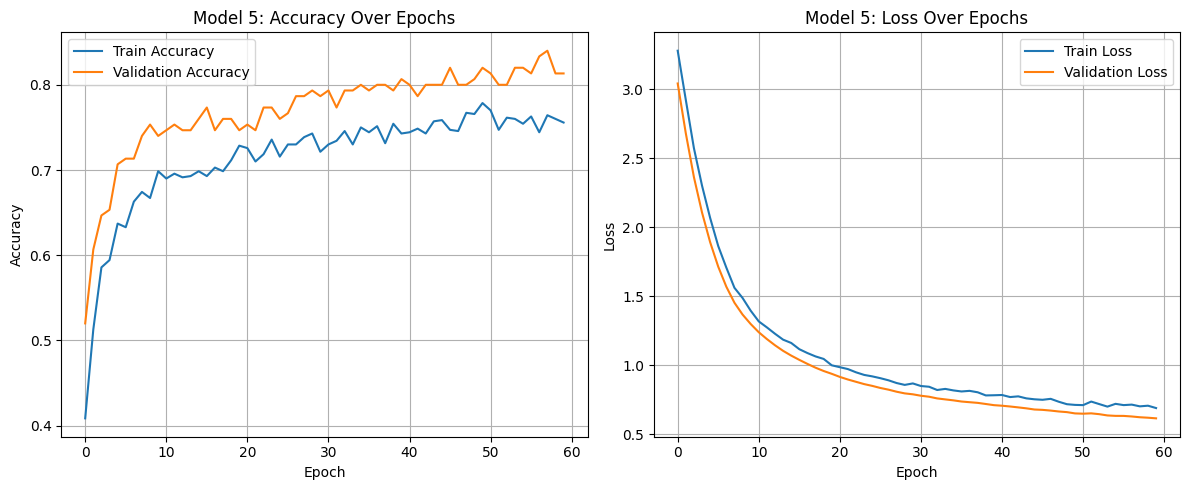

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_opt3.history['accuracy'], label='Train Accuracy')
plt.plot(history_opt3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 5: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_opt3.history['loss'], label='Train Loss')
plt.plot(history_opt3.history['val_loss'], label='Validation Loss')
plt.title('Model 5: Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()